In [11]:
from tensorflow.keras import datasets, utils, optimizers, losses, callbacks
from src.model import cnn_model
from src.utils import read_config, plot_results, plot_predicts
import datetime

In [2]:
config = read_config()

### Data Preparation

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing
X_train = train_images.reshape(len(train_images), 28, 28, 1)
X_test = test_images.reshape(len(test_images), 28, 28, 1)

# Normalization
X_train = X_train.astype('float32') / 255
X_test =  X_test.astype('float32') / 255

# OneHot Encoding
Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

### Model Compile and Callbacks

In [4]:
model = cnn_model()
model.summary()
model.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
_________________________________________________________________


In [5]:
checkpoints = callbacks.ModelCheckpoint(config["training_data"]["callbacks_path_checkpoints"] + 'weights_epoch_{epoch}.h5',
                                        monitor='val_loss',
                                        save_weights_only=True)
tensorboard = callbacks.TensorBoard(config["training_data"]["callbacks_path_tensorboard"] + 'tensorboard')
csv_logger = callbacks.CSVLogger(config["training_data"]["callbacks_path_csvlogger"] + 'training.log')
callbacks_list = [checkpoints, tensorboard, csv_logger]

### Model Train

In [6]:
time_start = datetime.datetime.now()
model_history = model.fit(X_train, Y_train,
                           batch_size=config["training_data"]["batch_size"],
                           epochs=config["training_data"]["epochs"], 
                           validation_split=config["training_data"]["validation_split"],
                           shuffle=True,
                           callbacks=callbacks_list)
time_end = datetime.datetime.now()
print(f"Training Time: {time_end-time_start}")

Epoch 1/50
375/375 [==============================] - 6s 10ms/step - loss: 0.3937 - accuracy: 0.8873 - val_loss: 0.1538 - val_accuracy: 0.9578
Epoch 2/50
375/375 [==============================] - 3s 9ms/step - loss: 0.1192 - accuracy: 0.9654 - val_loss: 0.0991 - val_accuracy: 0.9707
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0811 - accuracy: 0.9754 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.0690 - val_accuracy: 0.9798
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.0688 - val_accuracy: 0.9793
Epoch 6/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0639 - val_accuracy: 0.9809
Epoch 7/50
375/375 [==============================] - 4s 10ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0612 - val_accuracy: 0.9822


In [7]:
model.save(config["training_data"]["model_save_path"] + 'model.h5')
model.save_weights(config["training_data"]["model_save_path"] + 'model_weights.h5')

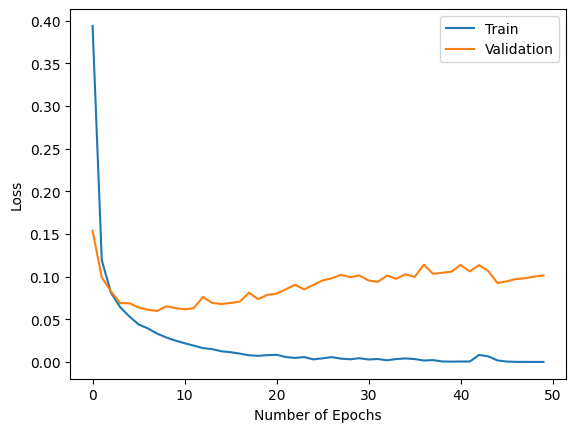

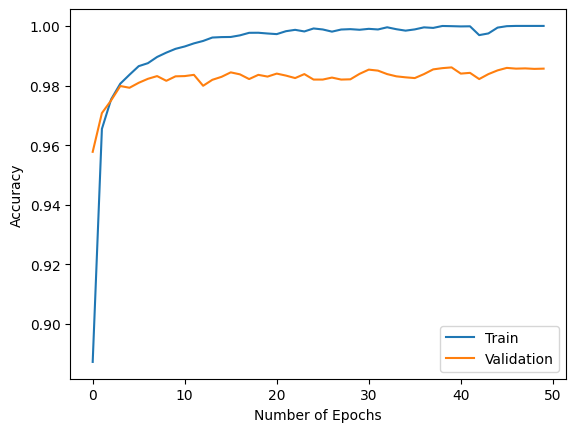

In [8]:
plot_results(model_history)

## Model Evaluation

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy: ", test_accuracy); print("Test Loss: ", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0798 - accuracy: 0.9884
Test Accuracy:  0.9883999824523926
Test Loss:  0.07977364957332611


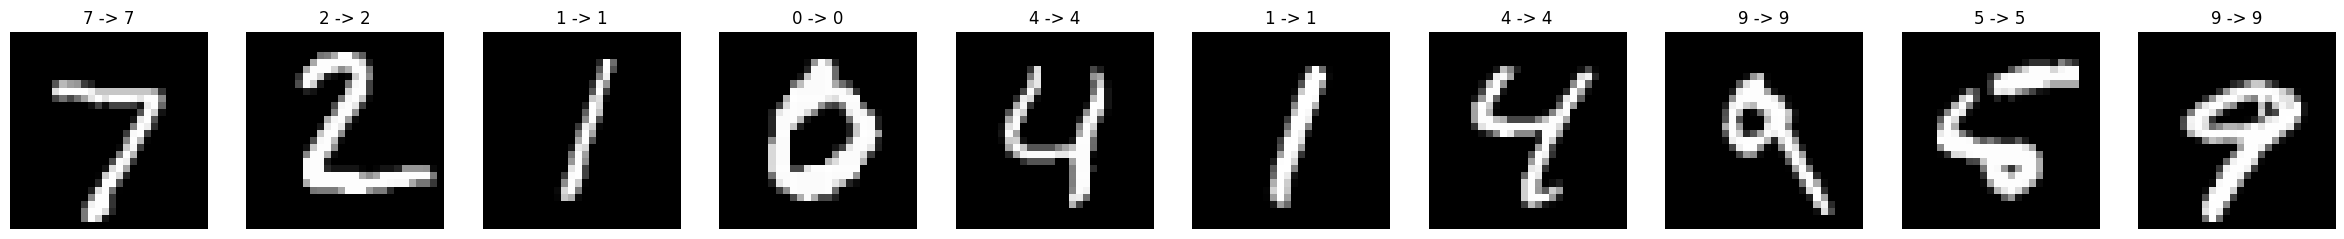

In [12]:
plot_predicts(model, X_test, test_labels, test_images, 10)